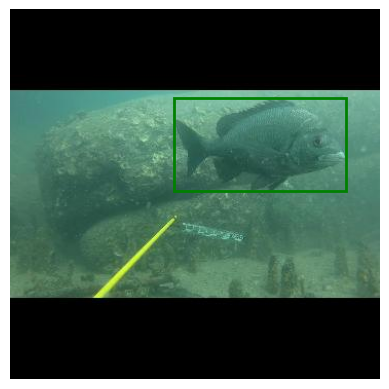

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def load_yolo_annotations(txt_path):
    annotations = []
    with open(txt_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            # YOLO format: class_id center_x center_y width height
            class_id, center_x, center_y, box_width, box_height = map(float, line.strip().split())
            annotations.append([class_id, center_x, center_y, box_width, box_height])
    return annotations

def draw_bounding_boxes(image_path, txt_path, class_names=None):
    # Load image
    image = Image.open(image_path)
    image_width, image_height = image.size

    # Load the annotations
    annotations = load_yolo_annotations(txt_path)

    # Create a figure and axis
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # Add bounding boxes to the figure
    for annotation in annotations:
        class_id, center_x, center_y, box_width, box_height = annotation
        
        # Convert relative coordinates to absolute pixel coordinates
        x1 = (center_x - box_width / 2) * image_width
        y1 = (center_y - box_height / 2) * image_height
        box_width = box_width * image_width
        box_height = box_height * image_height
        
        # Create a rectangle patch
        rect = patches.Rectangle((x1, y1), box_width, box_height, linewidth=2, edgecolor='green', facecolor='none')
        
        # Add the rectangle to the plot
        ax.add_patch(rect)

    # Show the image with bounding boxes
    plt.axis('off')
    plt.show()


image_path = '../../yolo/datasets/DeepFish-2/valid/images/9908_Acanthopagrus_palmaris_f000051_jpg.rf.3f4d75c61b41b620205f7c9bc537e2ea.jpg'
txt_path = '../../yolo/datasets/DeepFish-2/valid/labels/9908_Acanthopagrus_palmaris_f000051_jpg.rf.3f4d75c61b41b620205f7c9bc537e2ea.txt'

# Example usage:
draw_bounding_boxes(image_path, txt_path)
